## Library

In [1]:
# data processing
import numpy as np
import pandas as pd
!pip install category_encoders
import category_encoders as ce
from google.colab import files

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats
from scipy.stats import chi2_contingency

# others
from google.colab import drive
import io
import os
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)


## View Data

In [2]:
df = pd.read_excel('/content/sample_data/Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## Check Duplicates

In [3]:
df.duplicated(subset=["CustomerID", "Country"]).sum()

np.int64(0)

*notes

Bila ada data yg duplicate maka :

df.drop_duplicates(subset=["CustomerID", "Country"], inplace=True)

## Change Columns Name

In [4]:
new_col = df.columns.str.lower().str.replace(' ', '_')
df.columns = new_col
df.head()

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## Check DataFrame Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         7043 non-null   object 
 1   count              7043 non-null   int64  
 2   country            7043 non-null   object 
 3   state              7043 non-null   object 
 4   city               7043 non-null   object 
 5   zip_code           7043 non-null   int64  
 6   lat_long           7043 non-null   object 
 7   latitude           7043 non-null   float64
 8   longitude          7043 non-null   float64
 9   gender             7043 non-null   object 
 10  senior_citizen     7043 non-null   object 
 11  partner            7043 non-null   object 
 12  dependents         7043 non-null   object 
 13  tenure_months      7043 non-null   int64  
 14  phone_service      7043 non-null   object 
 15  multiple_lines     7043 non-null   object 
 16  internet_service   7043 

## Drop Columns Thats Have To Many Nulls Values

In [6]:
df.drop("churn_reason", axis=1, inplace=True)

## Check Unsual DataType and Change It

Karena Total Charge tersebut harusnya dalam bentuk float bukan object

In [7]:
df['total_charges'].unique()

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

In [8]:
df['total_charges'].value_counts()

,count
total_charges,
20.2,11
,11
19.75,9
20.05,8
19.65,8
...,...
394.1,1
7589.8,1
905.55,1


In [9]:
df['total_charges'].replace(' ', np.nan, inplace=True)
df['total_charges']

,total_charges
0,108.15
1,151.65
2,820.50
3,3046.05
4,5036.30
...,...
7038,1419.40
7039,1990.50
7040,7362.90
7041,346.45


In [10]:
df['total_charges'].value_counts(normalize=True)*100

,proportion
total_charges,
20.20,0.156428
19.75,0.127986
20.05,0.113766
19.90,0.113766
19.65,0.113766
...,...
394.10,0.014221
7589.80,0.014221
905.55,0.014221


## Check NaN

Check lagi apakah ada value NaN selain di column Total Charge

In [11]:
df.isna().sum() / len(df) * 100

,0
customerid,0.000000
count,0.000000
country,0.000000
state,0.000000
city,0.000000
zip_code,0.000000
lat_long,0.000000
latitude,0.000000
longitude,0.000000
gender,0.000000


## Fill Missing Data (NaN)

In [12]:
df['total_charges'].describe()

,total_charges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


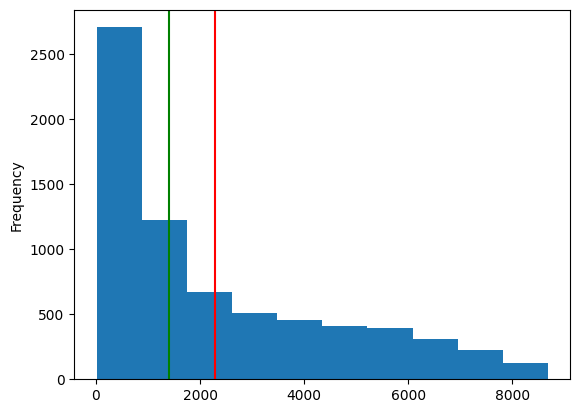

In [13]:
df['total_charges'].plot(kind='hist')
plt.axvline(x=df['total_charges'].mean(), color='red')
plt.axvline(x=df['total_charges'].median(), color='green')
plt.show()

In [14]:
df_clean = df.copy()
df_clean['total_charges'] = df_clean['total_charges'].fillna(df_clean['total_charges'].median())
df_clean.isna().sum() / len(df_clean) * 100

,0
customerid,0.0
count,0.0
country,0.0
state,0.0
city,0.0
zip_code,0.0
lat_long,0.0
latitude,0.0
longitude,0.0
gender,0.0


In [15]:
df_clean.to_excel("hasil_cleansing_telco.xlsx", index=False)
files.download("hasil_cleansing_telco.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EDA (Exploratory Data Analyst)
Purpose of this project is to predict wether a customer will churn or not, in term of using our product.

# Box Plot

In [16]:
df_clean.drop(['count', 'zip_code', 'latitude', 'longitude'], axis=1, inplace=True)
numeric_col = df_clean.select_dtypes(exclude='object').columns
numeric_col

Index(['tenure_months', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv'],
      dtype='object')

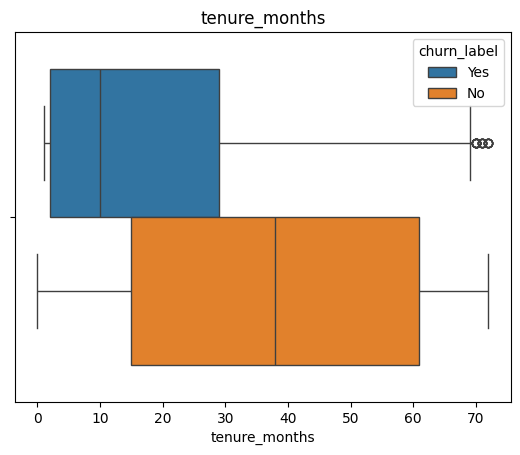

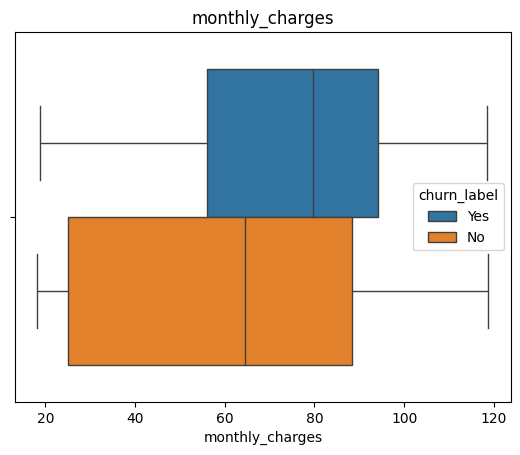

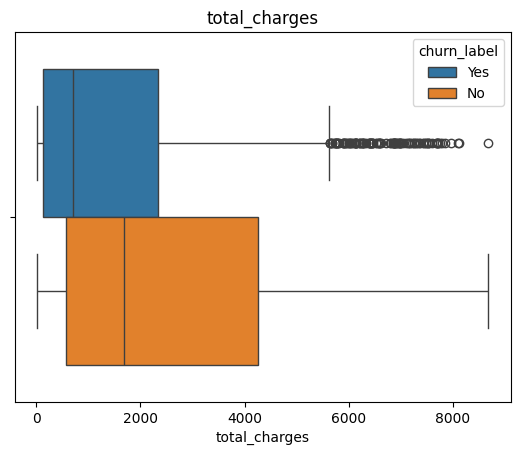

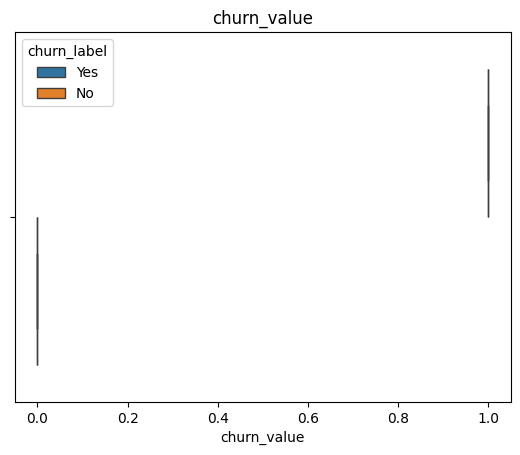

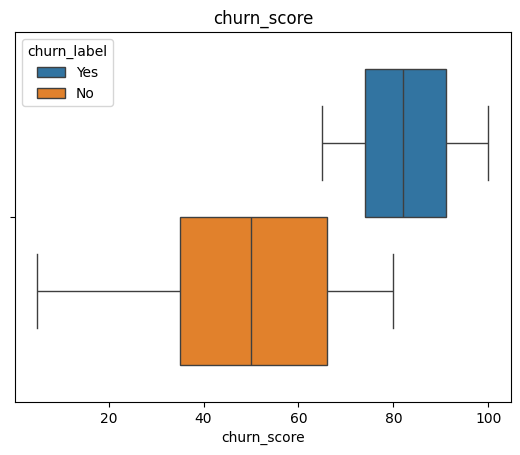

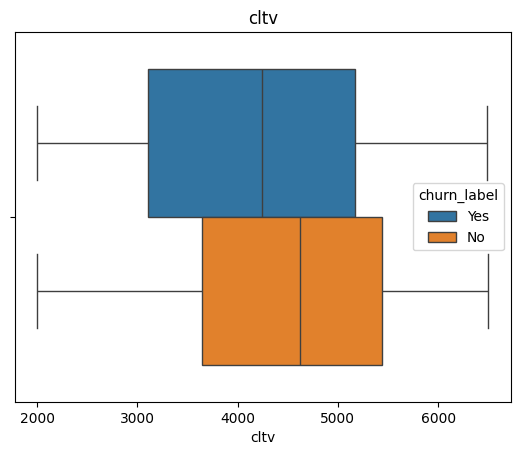

In [17]:
for col in numeric_col:
  sns.boxplot(data = df, x = col, hue = 'churn_label')
  plt.title(col)
  plt.show()

# Hist Plot

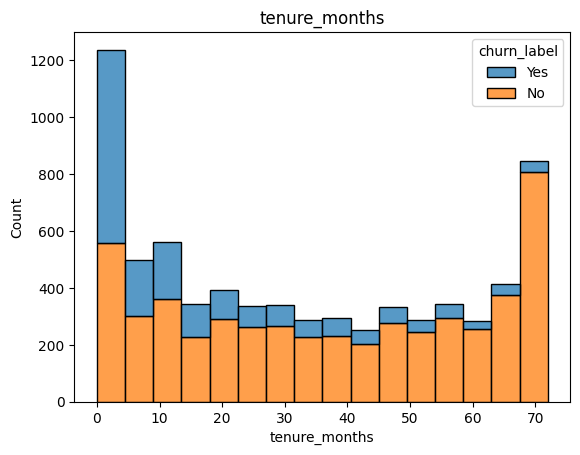

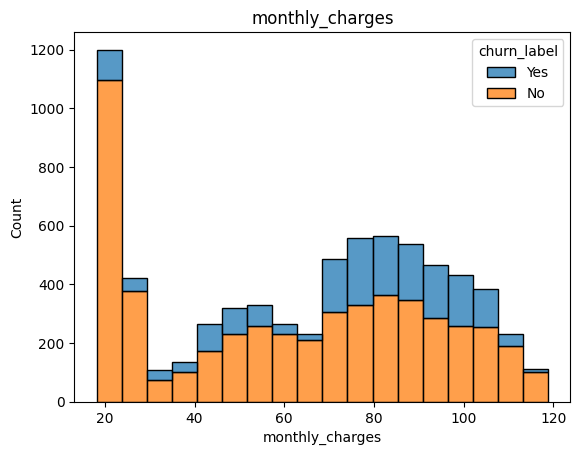

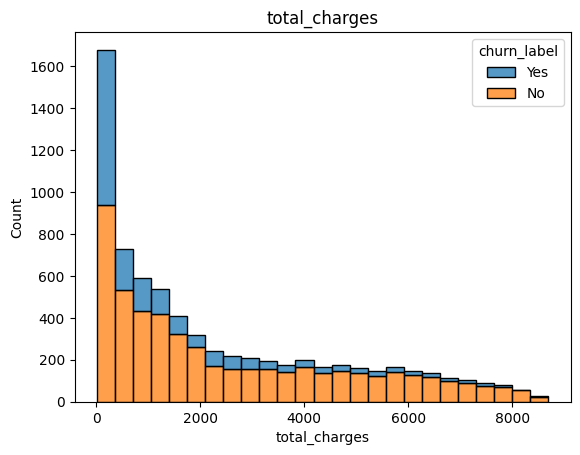

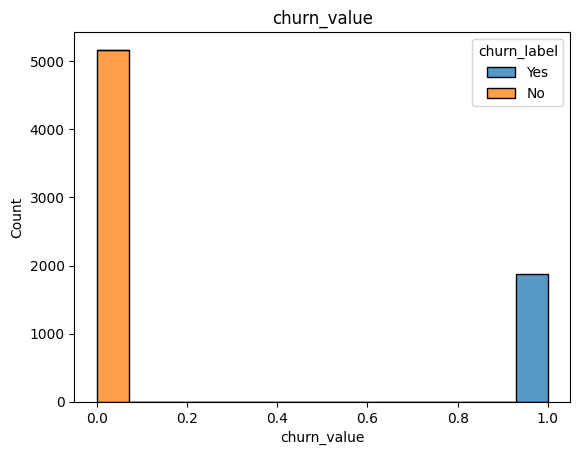

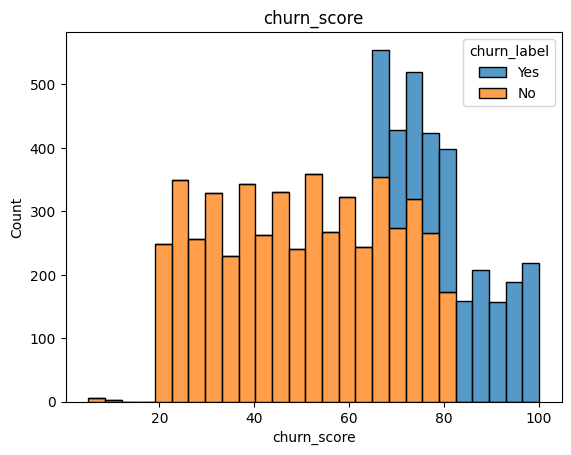

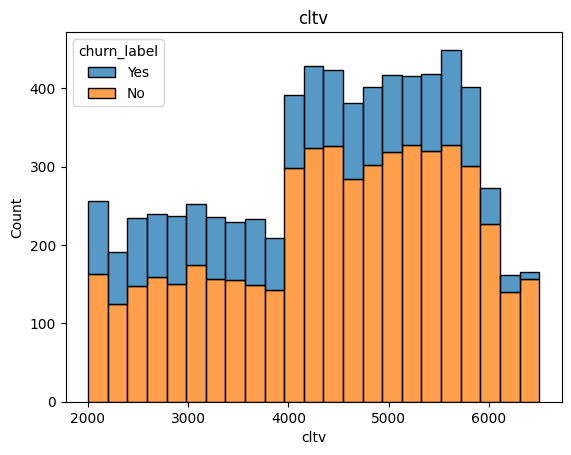

In [18]:
for col in numeric_col:
  sns.histplot(data = df, x = col, hue = 'churn_label', multiple = 'stack')
  plt.title(col)
  plt.show()

# Churn Label Propotion

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         7043 non-null   object 
 1   country            7043 non-null   object 
 2   state              7043 non-null   object 
 3   city               7043 non-null   object 
 4   lat_long           7043 non-null   object 
 5   gender             7043 non-null   object 
 6   senior_citizen     7043 non-null   object 
 7   partner            7043 non-null   object 
 8   dependents         7043 non-null   object 
 9   tenure_months      7043 non-null   int64  
 10  phone_service      7043 non-null   object 
 11  multiple_lines     7043 non-null   object 
 12  internet_service   7043 non-null   object 
 13  online_security    7043 non-null   object 
 14  online_backup      7043 non-null   object 
 15  device_protection  7043 non-null   object 
 16  tech_support       7043 

In [20]:
data_pie = df_clean['churn_value'].value_counts()
data_pie

,count
churn_value,
0,5174
1,1869


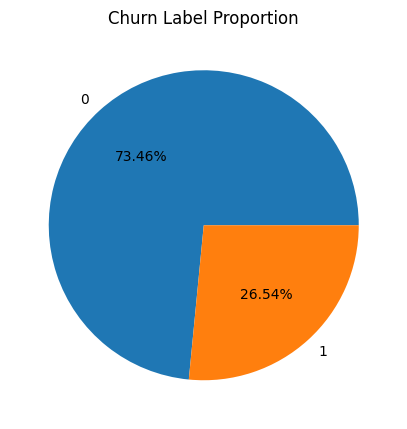

In [21]:
plt.figure(figsize=(5,10))
plt.pie(data_pie, labels=data_pie.index, autopct='%.2f%%')
plt.title('Churn Label Proportion')
plt.show()

Dari data diatas diketahui bahwa customer yg churn tercatat hanya 26.5% sedangkan customer yg memutuskan untuk terus menggunakan produk kita  tercatat 73.5% , oleh karena itu proporsi antara churn customer dan retain customer ialah non-balance

*Churn (atau tingkat churn/atrisi) adalah metrik yang mengukur persentase pelanggan yang berhenti menggunakan suatu produk atau layanan dalam periode waktu tertentu

## Check The Object Only

In [22]:
# hapus columns yg tidak akan dipakai
df_clean.drop(['customerid', 'country', 'state', 'lat_long'], axis=1, inplace=True)

In [23]:
object_col = df_clean.select_dtypes(include='object').columns
object_col

Index(['city', 'gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'churn_label'],
      dtype='object')

In [24]:
df_clean[object_col].nunique()
#category object

,0
city,1129
gender,2
senior_citizen,2
partner,2
dependents,2
phone_service,2
multiple_lines,3
internet_service,3
online_security,3
online_backup,3


In [25]:
pd.crosstab(df_clean['gender'], df_clean['churn_value'])

churn_value,0,1
gender,,
Female,2549,939
Male,2625,930


In [26]:
def chi2_testing(column):
  df_clean_ = df_clean.copy()
  contingency_table = pd.crosstab(df_clean_[column], df_clean_['churn_value'])
  churn_by_ = df_clean_.groupby(column)['churn_value'].value_counts(normalize=True).to_frame() * 100
  churn_by_.columns = ['Proportion']
  churn_by_pvt = churn_by_.reset_index().pivot(columns='churn_value', index=column, values='Proportion')
  display(churn_by_pvt)

  chi2, p_value, dof, expected = chi2_contingency(contingency_table)
  display(contingency_table)
  print(f'Prossecing Column: ', column)
  print(f'Chi2 Statistic: {chi2}')
  print(f'p-value: {p_value}')
  if p_value < 0.05:
      print(f'{column} is significant')
  else:
      print(f'{column} is not significant')

  churn_by_pvt.plot(kind='bar', stacked=True)
  plt.title(column)
  plt.show()
  print()

churn_value,0,1
city,,
Acampo,25.0,75.0
Acton,100.0,NaN
Adelanto,80.0,20.0
Adin,50.0,50.0
Agoura Hills,60.0,40.0
...,...,...
Yreka,100.0,NaN
Yuba City,75.0,25.0
Yucaipa,75.0,25.0


churn_value,0,1
city,,
Acampo,1,3
Acton,4,0
Adelanto,4,1
Adin,2,2
Agoura Hills,3,2
...,...,...
Yreka,4,0
Yuba City,6,2
Yucaipa,3,1


Prossecing Column:  city
Chi2 Statistic: 1233.567218891576
p-value: 0.014975403740977845
city is significant


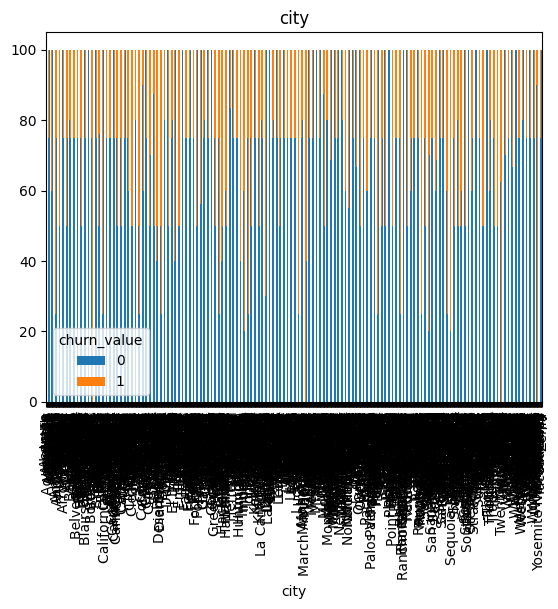

churn_value,0,1
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


churn_value,0,1
gender,,
Female,2549,939
Male,2625,930


Prossecing Column:  gender
Chi2 Statistic: 0.4840828822091383
p-value: 0.48657873605618596
gender is not significant


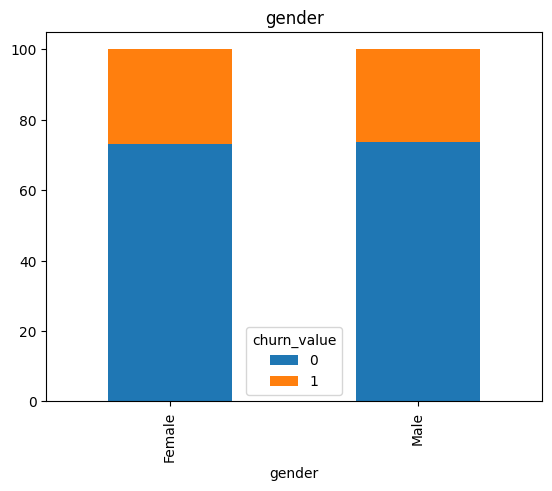

churn_value,0,1
senior_citizen,,
No,76.393832,23.606168
Yes,58.318739,41.681261


churn_value,0,1
senior_citizen,,
No,4508,1393
Yes,666,476


Prossecing Column:  senior_citizen
Chi2 Statistic: 159.42630036838742
p-value: 1.510066805092378e-36
senior_citizen is significant


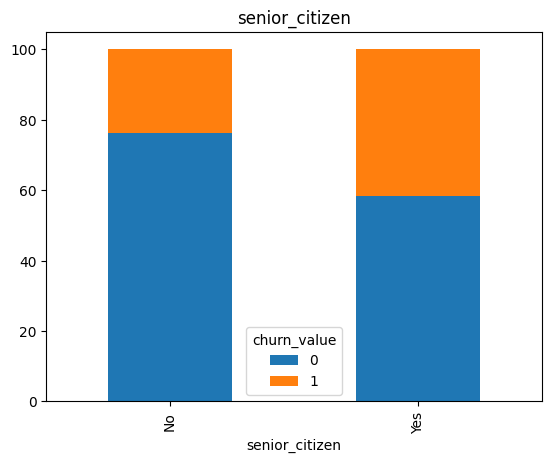

churn_value,0,1
partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


churn_value,0,1
partner,,
No,2441,1200
Yes,2733,669


Prossecing Column:  partner
Chi2 Statistic: 158.7333820309922
p-value: 2.1399113440759935e-36
partner is significant


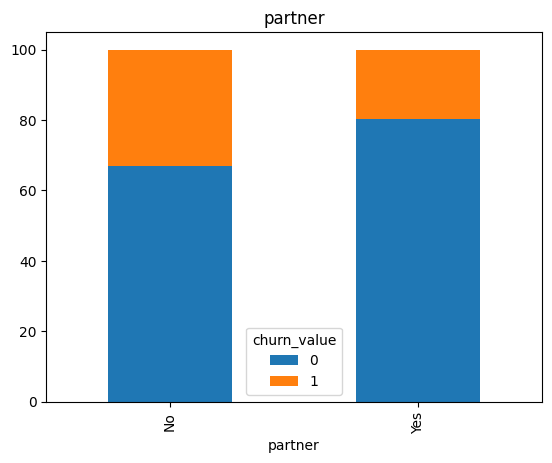

churn_value,0,1
dependents,,
No,67.448301,32.551699
Yes,93.484942,6.515058


churn_value,0,1
dependents,,
No,3653,1763
Yes,1521,106


Prossecing Column:  dependents
Chi2 Statistic: 433.7343787644573
p-value: 2.5009723998553557e-96
dependents is significant


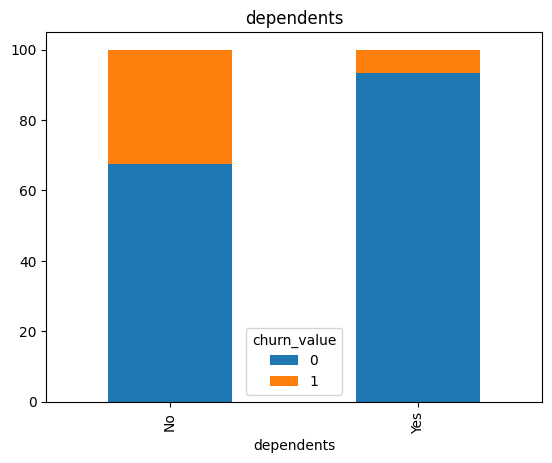

churn_value,0,1
phone_service,,
No,75.073314,24.926686
Yes,73.290363,26.709637


churn_value,0,1
phone_service,,
No,512,170
Yes,4662,1699


Prossecing Column:  phone_service
Chi2 Statistic: 0.9150329892546948
p-value: 0.3387825358066928
phone_service is not significant


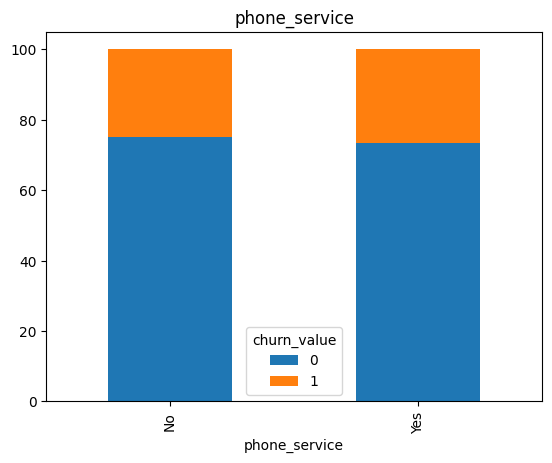

churn_value,0,1
multiple_lines,,
No,74.955752,25.044248
No phone service,75.073314,24.926686
Yes,71.390104,28.609896


churn_value,0,1
multiple_lines,,
No,2541,849
No phone service,512,170
Yes,2121,850


Prossecing Column:  multiple_lines
Chi2 Statistic: 11.33044148319756
p-value: 0.0034643829548773
multiple_lines is significant


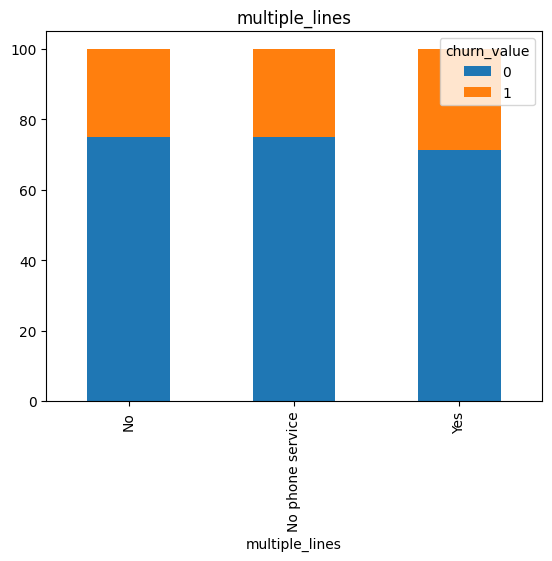

churn_value,0,1
internet_service,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


churn_value,0,1
internet_service,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


Prossecing Column:  internet_service
Chi2 Statistic: 732.309589667794
p-value: 9.571788222840544e-160
internet_service is significant


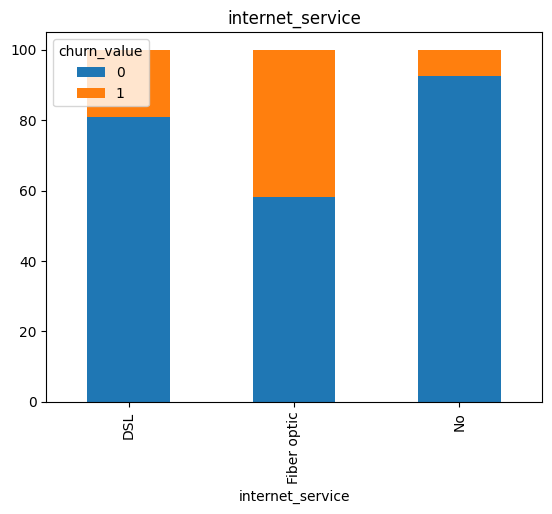

churn_value,0,1
online_security,,
No,58.233276,41.766724
No internet service,92.595020,7.404980
Yes,85.388806,14.611194


churn_value,0,1
online_security,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


Prossecing Column:  online_security
Chi2 Statistic: 849.9989679615965
p-value: 2.661149635176552e-185
online_security is significant


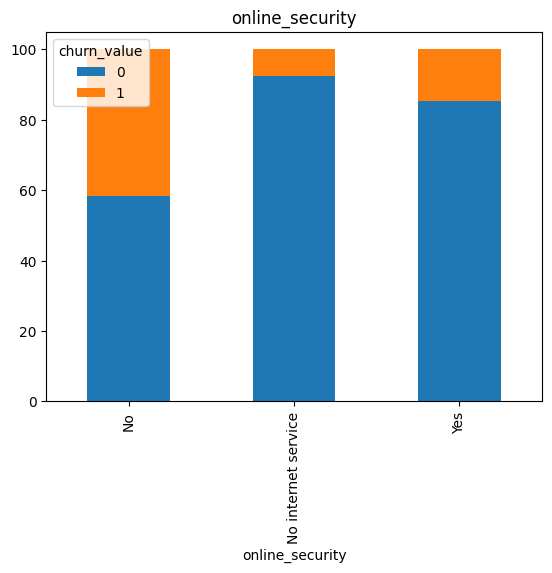

churn_value,0,1
online_backup,,
No,60.071244,39.928756
No internet service,92.595020,7.404980
Yes,78.468506,21.531494


churn_value,0,1
online_backup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


Prossecing Column:  online_backup
Chi2 Statistic: 601.812790113409
p-value: 2.0797592160864276e-131
online_backup is significant


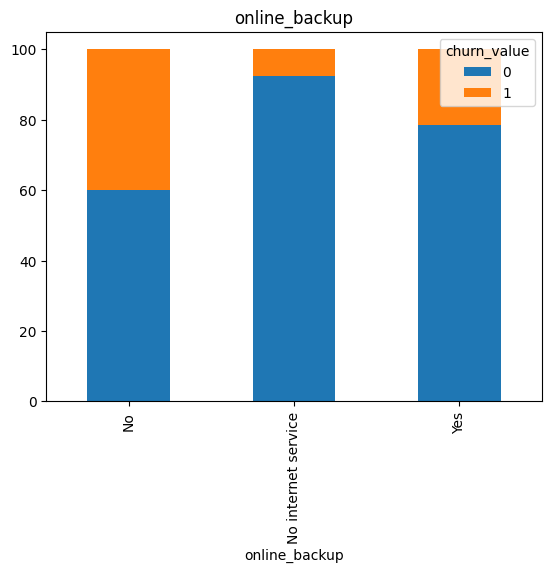

churn_value,0,1
device_protection,,
No,60.872375,39.127625
No internet service,92.595020,7.404980
Yes,77.497936,22.502064


churn_value,0,1
device_protection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


Prossecing Column:  device_protection
Chi2 Statistic: 558.419369407389
p-value: 5.505219496457244e-122
device_protection is significant


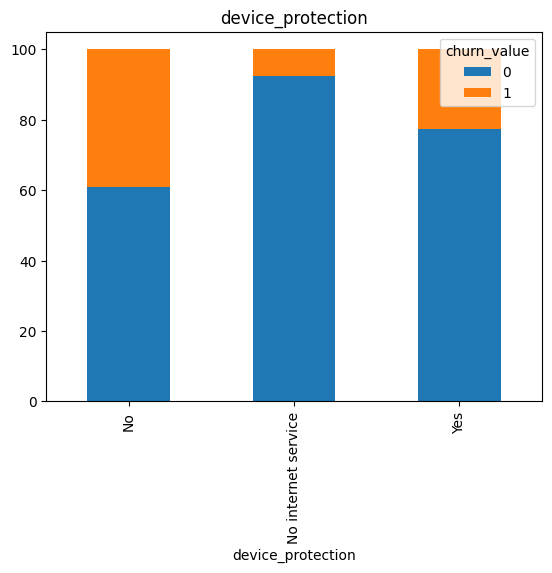

churn_value,0,1
tech_support,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


churn_value,0,1
tech_support,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


Prossecing Column:  tech_support
Chi2 Statistic: 828.1970684587394
p-value: 1.4430840279998987e-180
tech_support is significant


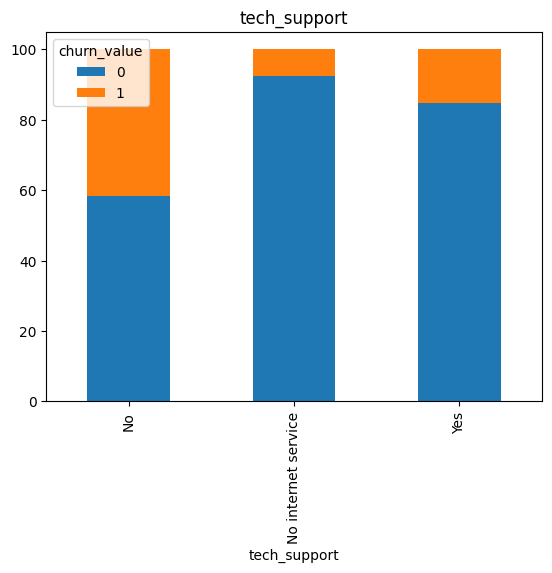

churn_value,0,1
streaming_tv,,
No,66.476868,33.523132
No internet service,92.595020,7.404980
Yes,69.929812,30.070188


churn_value,0,1
streaming_tv,,
No,1868,942
No internet service,1413,113
Yes,1893,814


Prossecing Column:  streaming_tv
Chi2 Statistic: 374.2039433109813
p-value: 5.528994485739183e-82
streaming_tv is significant


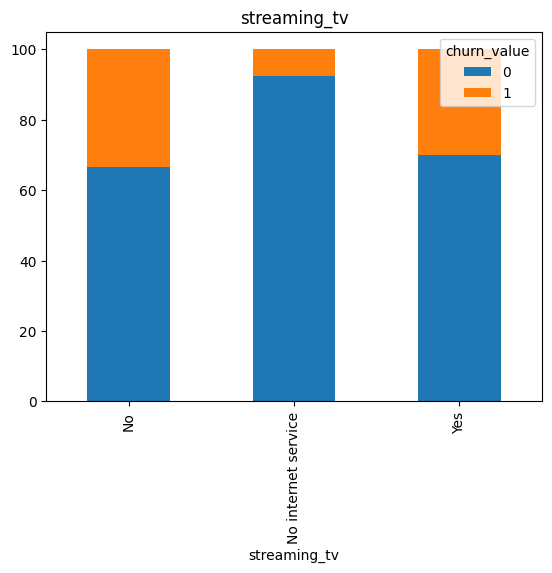

churn_value,0,1
streaming_movies,,
No,66.319569,33.680431
No internet service,92.595020,7.404980
Yes,70.058565,29.941435


churn_value,0,1
streaming_movies,,
No,1847,938
No internet service,1413,113
Yes,1914,818


Prossecing Column:  streaming_movies
Chi2 Statistic: 375.6614793452656
p-value: 2.667756755723681e-82
streaming_movies is significant


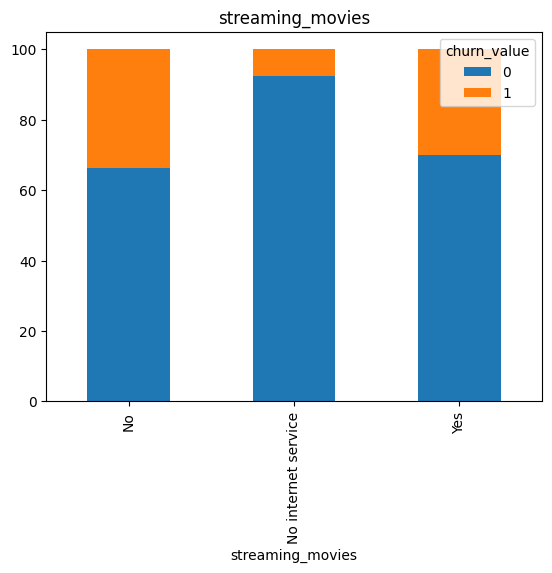

churn_value,0,1
contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


churn_value,0,1
contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


Prossecing Column:  contract
Chi2 Statistic: 1184.5965720837926
p-value: 5.863038300673391e-258
contract is significant


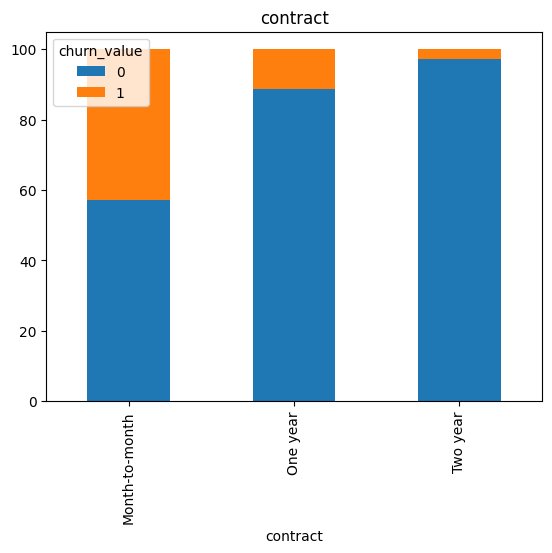

churn_value,0,1
paperless_billing,,
No,83.669916,16.330084
Yes,66.434908,33.565092


churn_value,0,1
paperless_billing,,
No,2403,469
Yes,2771,1400


Prossecing Column:  paperless_billing
Chi2 Statistic: 258.27764906707307
p-value: 4.073354668665985e-58
paperless_billing is significant


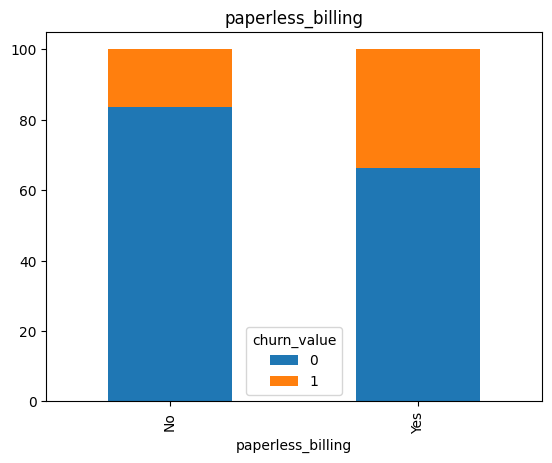

churn_value,0,1
payment_method,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


churn_value,0,1
payment_method,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


Prossecing Column:  payment_method
Chi2 Statistic: 648.1423274814
p-value: 3.6823546520097993e-140
payment_method is significant


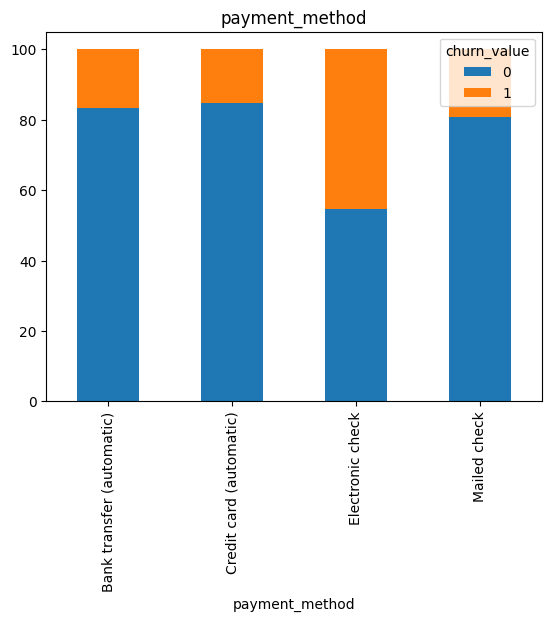

churn_value,0,1
churn_label,,
No,100.0,NaN
Yes,NaN,100.0


churn_value,0,1
churn_label,,
No,5174,0
Yes,0,1869


Prossecing Column:  churn_label
Chi2 Statistic: 7037.871379458012
p-value: 0.0
churn_label is significant


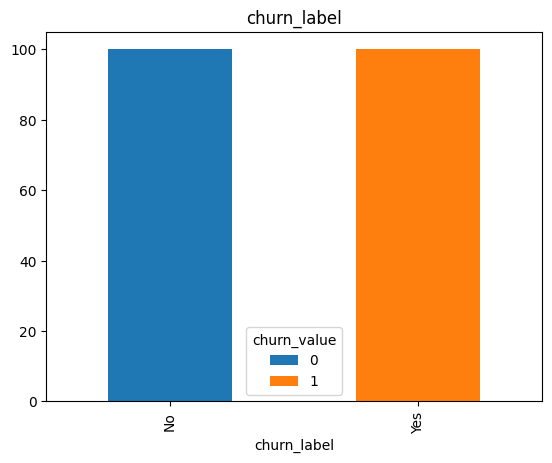

In [27]:
for col in object_col:
  chi2_testing(col)

## Check The Numeric Only

In [28]:
numeric_col = df_clean.select_dtypes(exclude='object').columns
numeric_col

Index(['tenure_months', 'monthly_charges', 'total_charges', 'churn_value',
       'churn_score', 'cltv'],
      dtype='object')

In [29]:
churn_value_0 = df_clean[df_clean['churn_value'] == 0]['tenure_months']
churn_value_1 = df_clean[df_clean['churn_value'] == 1]['tenure_months']
display(churn_value_0)
display(churn_value_1)

,tenure_months
1869,1
1870,34
1871,45
1872,22
1873,10
...,...
7038,72
7039,24
7040,72
7041,11


,tenure_months
0,2
1,2
2,8
3,28
4,49
...,...
1864,12
1865,9
1866,1
1867,67


In [30]:
def ttest_ind_testing(column):
  df_clean_ = df_clean.copy()
  churn_value_0 = df_clean_[df_clean_['churn_value'] == 0][column]
  churn_value_1 = df_clean_[df_clean_['churn_value'] == 1][column]

  sns.boxplot(data = df_clean_, x = column, hue = 'churn_label')
  plt.title(column)
  plt.show()

  stat, p_value = stats.ttest_ind(churn_value_0, churn_value_1)
  print(f'Processing column: ', column)
  print(f'T-test Statistic: {stat}')
  print(f'p-value: {p_value}')
  if p_value < 0.05:
    print(f'{column} is significant to churn')
  else:
    print(f'{column} is not significant to churn')
  print()

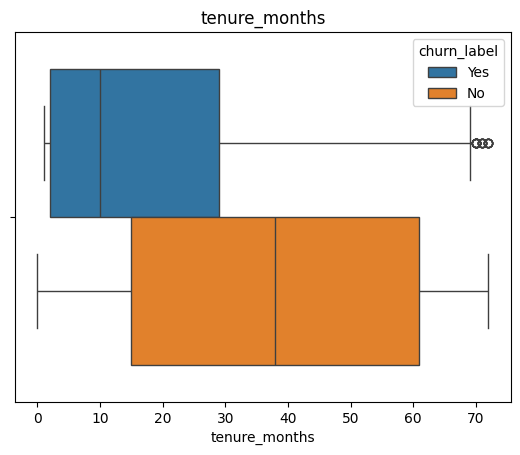

Processing column:  tenure_months
T-test Statistic: 31.57955051135377
p-value: 7.99905796059022e-205
tenure_months is significant to churn



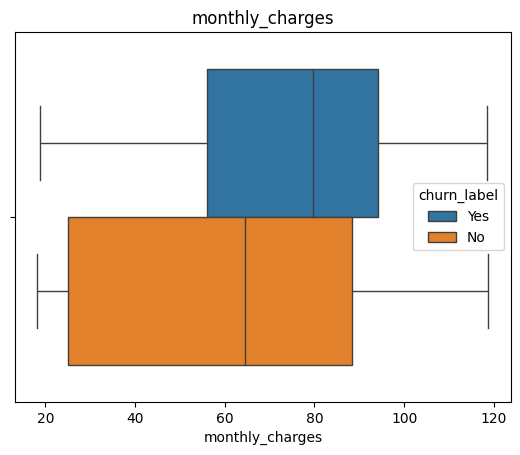

Processing column:  monthly_charges
T-test Statistic: -16.536738015936308
p-value: 2.7066456068884154e-60
monthly_charges is significant to churn



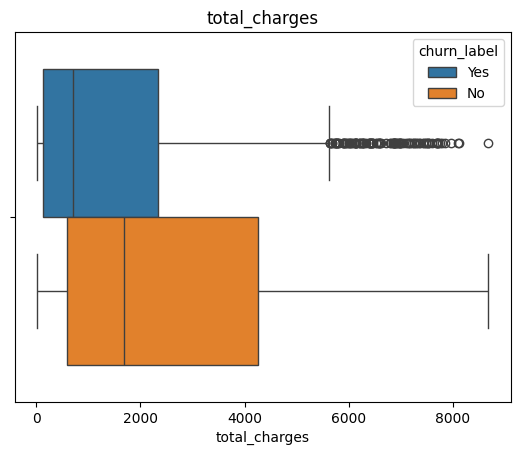

Processing column:  total_charges
T-test Statistic: 17.04229535246348
p-value: 7.508609056708869e-64
total_charges is significant to churn



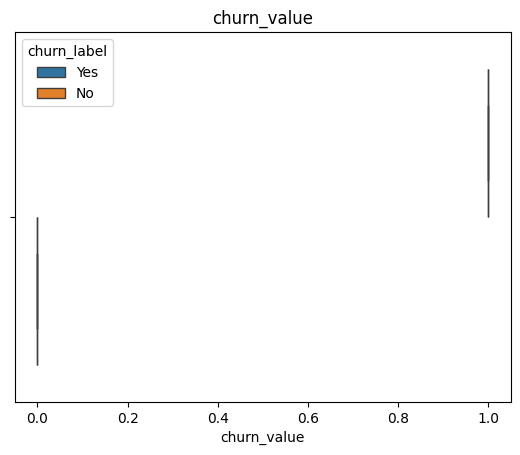

Processing column:  churn_value
T-test Statistic: -inf
p-value: 0.0
churn_value is significant to churn



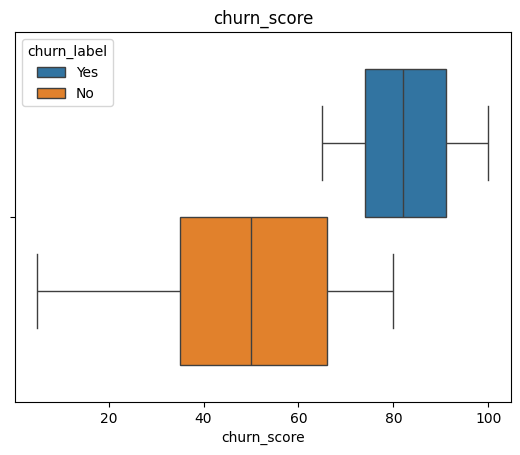

Processing column:  churn_score
T-test Statistic: -74.69451966174098
p-value: 0.0
churn_score is significant to churn



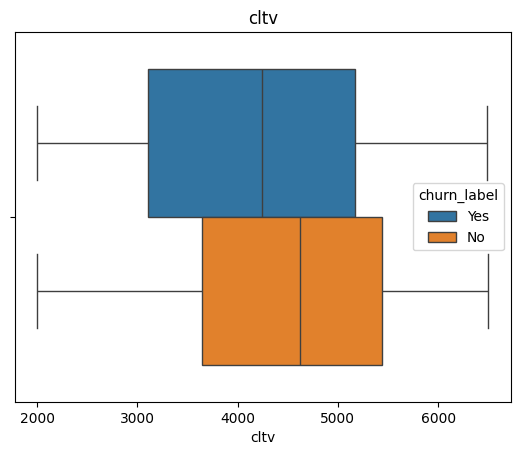

Processing column:  cltv
T-test Statistic: 10.783471254302428
p-value: 6.679131381698727e-27
cltv is significant to churn



In [31]:
for col in numeric_col:
  ttest_ind_testing(col)